In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.font_manager import fontManager, FontProperties
import ptitprince as pt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pingouin as pg
import statsmodels.api as sm
import language_tool_python as ltp


def get_img(name):
     path = "font/emojis/{}.png".format(name)
     im = plt.imread(path)
     return im

def offset_image(coord, name, ax, size=0.5):
    img = get_img(name)
    im = OffsetImage(img, zoom=size)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -21.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

def raincloud(x, y, markersize, df, order=None, hue=None):
    # adding color
    pal = sns.color_palette()
    if df is not None:
        means = df.groupby([x])[y].mean().reindex(order)
    else:
        if len(order) > 2:
            raise Exception('Too many unique x values for this custom plot')

        mean_1 = np.mean([i[0] for i in zip(y, x) if i[1] == order[0]])
        mean_2 = np.mean([i[0] for i in zip(y, x) if i[1] == order[1]])
        means = [mean_1, mean_2]

    dodge = None
    if hue:
        means = df.groupby([x, hue])[y].mean().reindex(order)
        dodge = True
        
    sns.scatterplot(
        x=means.index,
        y=means,
        color='white',
        edgecolor='black',
        s=150/2, linewidth=1.5, zorder=4)

    ax = pt.half_violinplot(x=x, y=y, data=df, palette=pal, bw=.25, cut=0., linewidth=0,
                            scale="area", width=.7, inner=None, orient='v', zorder=1, order=order, hue=hue, dodge=dodge)
    ax = sns.stripplot(x=x, y=y, data=df, palette=pal, edgecolor="white",  linewidth=1, order=order,
                       size=markersize, orient='v', zorder=2, jitter=1, alpha=0.6, hue=hue, dodge=dodge)

    ax2 = sns.pointplot(x=x, y=y, data=df, color='black',  join=False, errorbar='se', linewidth=1,
     edgecolor='black', capsize=.06, zorder=3, bw=0, order=order, hue=hue, dodge=dodge)

<AxesSubplot:>

Text(0.5, 1.0, 'N=69')

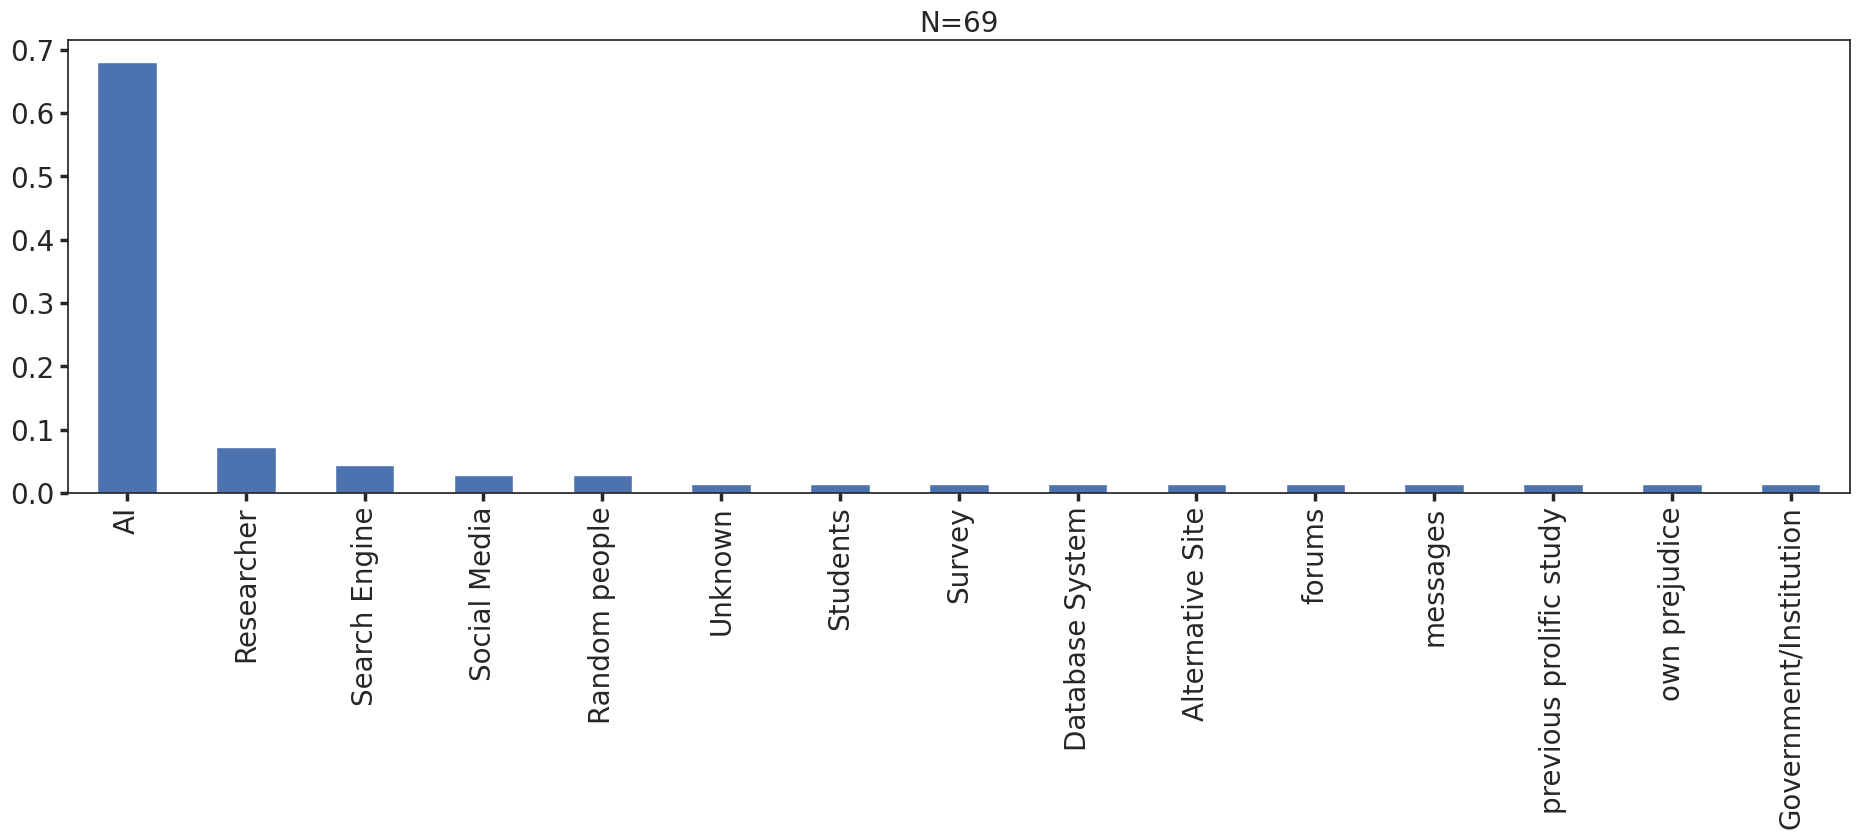

In [101]:
import pandas as pd


question = pd.DataFrame(
    {
        'prolific_id': [
            '61569ee5ec13f9d23135674e',
            '5bdb3a8a7d2000000160cc3a',
            '60ecb3f500857abf7ae07653',
            '5e1a5cd3cd15fa2dcea59c86',
            '62cfee5a0c2e87501bfb10bc',
            '5702c03e68c641000e0d754d',
            '62ceae04736349fd200814a0',
            '5870a098da731b000104a3ff',
            '6361626a199ea624d2a8b858',
            '5b9e90661641f90001d857ff',
            '5e4465013f75e52fc82f7096',
            '5fd7b5c1b6d6ef043967330c',
            '5e2b69d9cda3641bb38769b1',
            '63fc726d072344aa67fb98f7',
            '5ed51cadb2c5c106a6d1f561',
            '5ae64fb8c3c3ab00018f7e89',
            '58ab2477ea3d11000170e6e1',
            '5c3db89c112ad80001cab75e',
            '5c5404c24831db000161c5e8',
            '5d46c556fb0ce0001a04fd01',
            '6121190671d1042b24d8d67b',
            '6006a7b7f57a4801ea3a8323',
            '5ac64f340527ba0001c224fc',
            '62cebb481d8dff18f66ef320',
            '5f4ac049c374f51158b481ba',
            '57a5c633275be6000135b61c',
            '63473251dfa54bc71403c42a',
            '5dbcaecb740cc224d8d0985e',
            '5a17467d5d06850001b00c41',
            '63e62822e21e6a98fe55d267',
            '5e510d0760dd0913e45370dc',
            '5eb4396df04311266e7b5110',
            '616ef0bb9875de5db97fcb4c',
            '5aa6e3d04eecca0001ddfc96',
            '604fb38595629d1c47bdd8ae',
            '58c58d1493dac30001d49c3d',
            '5b08185856655d0001bbfb1b',
            '5e5521580ee1b951df544c3c',
            '5755c957eb80c4000741a9ce',
            '616c98c5821cbeeffb348e40',
            '60aa5aa9be013c928a5ac92e',
            '55b2d3f2fdf99b525bc839aa',
            '5b2837eca7cee100011dd1ae',
            '5b7dceae2b57a90001916438',
            '5fc6a6691dd15336fcc81742',
            '610a7e09afea7de62171c59d',
            '63dc3daf33ede5b0c14e397e',
            '5bb3b490763e440001853e4f',
            '63fb8d0d8736cf01d94cb230',
            '5d3e47ba29130a00015cd41d',
            '615edb3967bc743ac381a940',
            '63e55ecaa002eb54284210e8',
            '6150e5601a0e7a3fbcfb9bfb',
            '63469f35701f6b1eb1e76b1f',
            '6005f8260fead291c70fc06e',
            '60717a4513f00ff2df378f05',
            '60dca45abca3eb229bafdedf',
            '60db6a9490422a8ae4555563',
            '58aca85e0da7f10001de92d4',
            '6071a3faff84952d04771a21',
            '62cbebd0b3641f4745d7c863',
            '61bb372340db417c1a1389c6',
            '5aabf0385e19aa00013c21a5',
            '5c7fe02f3eaee4001614f81a',
            '612b285f53d29d3549618b96',
            '60ea38c4daf970d96f76fa96',
            '62a71f84d2f2f15e6cefae40',
            '61588a883213fd00ccae7c21',
            '63e51bd397b0f5edcbf78895',
        ],
        'answer': [
            'AI',
            'AI',
            'AI',
            'Social Media',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'Random people',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'Unknown',
            'AI',
            'Random people',
            'AI',
            'Search Engine',
            'Students',
            'AI',
            'AI',
            'Survey',
            'Database System',
            'AI',
            'AI',
            'Search Engine',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'Alternative Site',
            'AI',
            'AI',
            'forums',
            'AI',
            'AI',
            'Search Engine',
            'messages',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'previous prolific study',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'own prejudice',
            'AI',
            'AI',
            'AI',
            'AI',
            'Social Media',
            'Government/Institution',
        ]})

question.answer.value_counts(normalize=True).plot(kind='bar')
import matplotlib.pyplot as plt
plt.title('N=' + str(question.prolific_id.nunique()))


In [12]:
f1 = 'HUMANS/turing_dv3_82.csv'
f2 = 'HUMANS/turing_109.csv'
f3 = 'HUMANS/turing_prolific_79.csv'
f4 = 'HUMANS/turing_dv2_humanized_79.csv'

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df3 = pd.read_csv(f3)
df4 = pd.read_csv(f4)

for df, n_rows, engine in zip([df1, df2, df3, df4], [135, 138, 138, 138], ['dv3', 'dv2', 'dv2_prolific', 'dv2_humanized']):
    df = df[df.prolific_id.isin(df.prolific_id.value_counts()[
                                df.prolific_id.value_counts() == n_rows].index)]

    print("complete =", (df.groupby('prolific_id').prolific_id.count() == n_rows).sum())
    print("incomplete =", (df.groupby(
        'prolific_id').prolific_id.count() != n_rows).sum())
    # print("dataset_id that are complete =", df.dataset_id.value_counts()==138)
    print("dataset_id that are incomplete =",
          [
              i for i in range(77)
              if i not in df.dataset_id.value_counts().index
          ])
    print("dataset_id that are complete =",
          [
              i for i in range(77)
              if i in df.dataset_id.value_counts().index
          ])

    print("dataset_id that are incomplete =",
          len(
              [i for i in range(77) if i not in df.dataset_id.value_counts().index]))

    df['correct'] = None
    df['correct'] = df.correct.astype(bool)
    df['agree1'] = None
    df['agree1'] = df.agree1.astype(bool)
    df['agree2'] = None
    df['agree2'] = df.agree2.astype(bool)

    df.loc[df.q_id == 2, 'correct'] = df.source == df.answer
    
    if engine == 'dv2_prolific':
        df.loc[df.q_id == 2, 'correct'] = \
            ((df.source == 'Human') & (df.answer == 'Prolific')) | ((df.source == 'AI') & (df.answer == 'Not Prolific'))
    df.loc[df.q_id == 1, 'agree2'] = df.answer.str.contains('Yes')
    df.loc[df.q_id == 0, 'agree1'] = df.answer.str.contains('Yes')

    # clear weird characters in answers
    df.loc[df.answer.str.contains('Yes'), 'answer'] = 'Yes'
    # df.loc[df.answer.str.contains('No'), 'answer'] = 'No'
    df.loc[df.answer.str.contains('AI'), 'answer'] = 'AI'
    df.loc[df.answer.str.contains('Human'), 'answer'] = 'Human'

    # add correct and agree1 to all rows where item id is the same (easier to plot)
    for i in df.item_id.unique():
        df.loc[df.item_id == i, 'correct'] = \
            df[(df.item_id == i) & (df.q_id == 2)].correct.values[0]
        df.loc[df.item_id == i, 'agree1'] = \
            df[(df.item_id == i) & (df.q_id == 0)].agree1.values[0]
        df.loc[df.item_id == i, 'agree2'] = \
            df[(df.item_id == i) & (df.q_id == 1)].agree2.values[0]

        df.loc[df.item_id == i, 'turing'] = \
            df[(df.item_id == i) & (df.q_id == 2)].answer.values[0]

    # df['agree1']
    df['agree_both'] = df.agree1 & df.agree2
    df['disagree_both'] = ~df.agree1 & ~df.agree2
    
    df['engine'] = engine
    
    exec(f'{engine} = df.copy()')

np.random.seed(123)
# TODO: keep only one subject per dataset id
ids_to_keep_dv2 = []
ids_to_keep_dv3 = []
for i in range(77):
    ids_to_keep_dv2.append(
        np.random.choice(dv2[dv2.dataset_id == i].prolific_id.unique()))
    try:
        ids_to_keep_dv3.append(
            np.random.choice(dv3[dv3.dataset_id == i].prolific_id.unique()))
    except:
        print('Index error', i)
dv2 = dv2[dv2.prolific_id.isin(ids_to_keep_dv2)]
dv3 = dv3[dv3.prolific_id.isin(ids_to_keep_dv3)]
# dv2_prolific = dv2_prolific[dv2_prolific.prolific_id.isin(ids_to_keep)]
# ids = dv2.groupby('dataset_id').prolific_id.transform('nunique') > 1
# print(ids)
df = pd.concat([dv2, dv3, dv2_prolific, dv2_humanized])


complete = 82
incomplete = 0
dataset_id that are incomplete = [76]
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
dataset_id that are incomplete = 1


/tmp/ipykernel_8357/711844145.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['correct'] = None
/tmp/ipykernel_8357/711844145.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['correct'] = df.correct.astype(bool)
/tmp/ipykernel_8357/711844145.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

complete = 112
incomplete = 0
dataset_id that are incomplete = []
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
dataset_id that are incomplete = 0
complete = 79
incomplete = 0
dataset_id that are incomplete = []
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
dataset_id that are incomplete = 0
complete = 79
incomplete = 0
dataset_id that are incomplete = []
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

In [139]:
N = []
for i, engine in enumerate(('dv2', 'dv3', 'dv2_prolific')):
    N.append(len(df[df.engine == engine].prolific_id.unique()))
    print('Engine=', engine, 'N=', N[i])

n_total = len(df.prolific_id.unique())
# assert n_total == sum(N)

str(question.prolific_id.isin(df[df.engine=='dv2_prolific'].prolific_id.unique()).sum()) + ' ids in dv2_prolific_last_question are in the main dataset'

Engine= dv2 N= 77
Engine= dv3 N= 76
Engine= dv2_prolific N= 79


'69 ids in dv2_prolific_last_question are in the main dataset'

In [12]:
# bonus for correct answers
bonus = df[(df.engine=='dv2_prolific') & (df.q_id==2)].groupby('prolific_id').correct.sum() * .05
# prolific_ids = ["5edfeb15743509317e9ec17c", "563f5535cbd4c60011dc9466", "60a746a3455cbbaefa083a14", "5c473c74819d580001782651", "60c283d8d82adfb1f4930352", "609bf576ae7704934d02cb52", "5e0fa4276f6d3e6adfca658a", "62d999e7f5f2cde114f4169e", "5edfd8872ec6382f20a1cd90", "5b6362cefaf7d30001e379e7", "5dc04aba55b86247c9991f89", "63bea8c366059643bc8e19da", "59637ac5d6b02c0001439808", "63d3fff8d2afe2d70a9202ba", "62cee0344bbf495f81b5643a", "60da1f2c84d5d4b2e46989c1", "60b6356523a427d506df6952", "5a7e2b4217ef350001704f52", "5b62ebb3c831f00001f60468", "6295f0cc367a8cbba24c694c", "5ef5d78781f1a703a60bf48f", "62fb7e29586929061efccda2", "5d6ed96c3fe1ac001add3be8", "5df227eb99b2821302e8dd5b", "5b438f3f7aec830001bb1a9a", "60d35d4fc34710a66ac98957", "5edd71517bdc7e9b05873eb0", "5d8f382400980b0019e21098", "5a099b6ca383a100011b49ec", "6346921046fa377ce55acbc1", "62cee0344bbf495f81b5643a", "60da1f2c84d5d4b2e46989c1", "60b6356523a427d506df6952", "5a7e2b4217ef350001704f52", "5b62ebb3c831f00001f60468", "6295f0cc367a8cbba24c694c", "5ef5d78781f1a703a60bf48f", "62fb7e29586929061efccda2", "5d6ed96c3fe1ac001add3be8", "5df227eb99b2821302e8dd5b", "5b438f3f7aec830001bb1a9a", "60d35d4fc34710a66ac98957", "5edd71517bdc7e9b05873eb0", "5d8f382400980b0019e21098", "5a099b6ca383a100011b49ec", "6346921046fa377ce55acbc1", "5b2a72f7c293b90001732b89", "637edbf206dac758898095d1", "5df7552e451be54ec34ff402", "6267bc7ac5d20db4d11af754", "5bbbcd283895e3000163213f", "62b4688a155412edaf3f73a3", "5aa69552f053610001726fd2", "5e5137be2f1d9c163f82331d", "616730370609638f039e4b59"]

for row in bonus.iteritems():
    # if row[0]=='5b5f5ec19351420001b7d473':
        # print(row[0]+ ',' + str(round(row[1], 2)))

    # if row 0 in 613ab311df99420815403fe9, 60772d61bc996f9fa5806f3f, 5effa1b1767027080863869d, 60e5cb4ca01a593fce9a379d, 6153144b6c389cb97e3169c3
    if row[0] in (
            '5e5521580ee1b951df544c3c',
            '55b2d3f2fdf99b525bc839aa',
            '5755c957eb80c4000741a9ce',
            '5b08185856655d0001bbfb1b',
            '60aa5aa9be013c928a5ac92e',
            '616c98c5821cbeeffb348e40',
            '5b7dceae2b57a90001916438',
            '5b2837eca7cee100011dd1ae'
    ):
        # if row[0]  in prolific_ids:
        print(row[0]+ ',' + str(round(row[1], 2)))

        # print(row[0]+ ',' + str(round(row[1], 2)))

55b2d3f2fdf99b525bc839aa,1.15
5755c957eb80c4000741a9ce,1.7
5b08185856655d0001bbfb1b,0.75
5b2837eca7cee100011dd1ae,1.4
5b7dceae2b57a90001916438,1.6
5e5521580ee1b951df544c3c,1.5
60aa5aa9be013c928a5ac92e,1.85
616c98c5821cbeeffb348e40,1.85


<AxesSubplot:>

<AxesSubplot:xlabel='item_idx', ylabel='correct'>

(0.0, 1.0)

Text(0.5, 0, 'Trial')

<AxesSubplot:>

<AxesSubplot:xlabel='item_idx', ylabel='correct'>

(0.0, 1.0)

Text(0.5, 0, 'Trial')

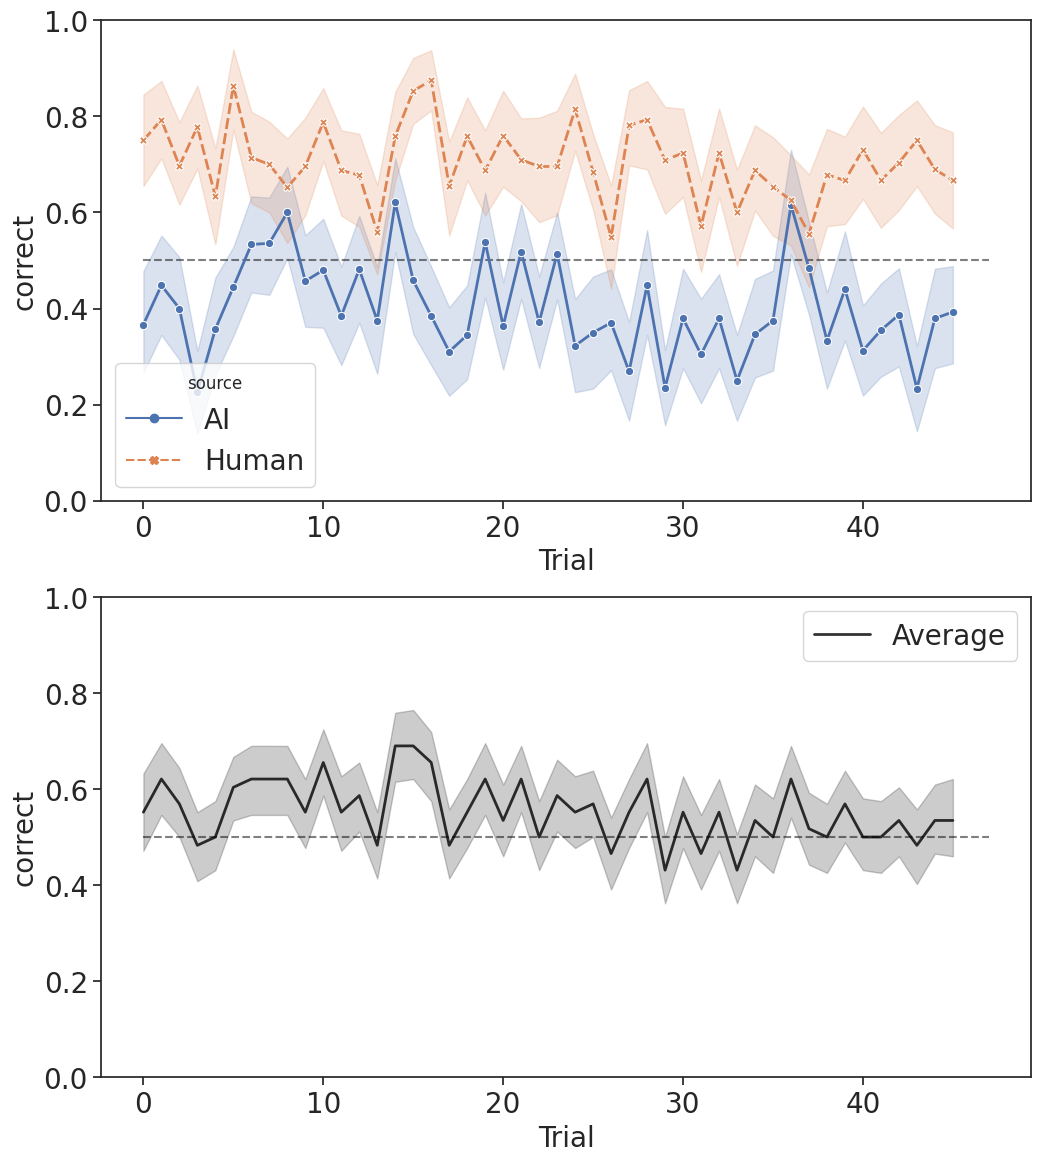

In [177]:
sns.set(
    rc={'figure.figsize':(12, 14), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20, 'xtick.labelsize': 20,
        'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False}
)

sns.set_palette('deep')
sns.set_style("ticks")

df2 = df[df.engine=='dv2_humanized']

# ----------------------------------------------------------------------------------------------------------------------
# PLOT 1
# ----------------------------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 1)
plt.plot([0, 47], [0.5, 0.5], '--', color='black', alpha=0.5)
sns.lineplot(x='item_idx', y='correct', data=df2, hue='source',  legend=True, linewidth=2, markers=True, style='source')
plt.ylim(0, 1)
plt.xlabel('Trial')

# ----------------------------------------------------------------------------------------------------------------------
# PLOT 2
# ----------------------------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 2)
plt.plot([0, 47], [0.5, 0.5], '--', color='black', alpha=0.5)
sns.lineplot(x='item_idx', y='correct', data=df2, color='black', linewidth=2, alpha=0.8, label='Average')
# sns.lineplot(x='item_idx', y='agree1', data=df,  legend=False, linewidth=2)
plt.ylim(0, 1)
plt.xlabel('Trial')

<AxesSubplot:xlabel='engine', ylabel='correct'>

(0.4, 0.8)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.899487,78,two-sided,0.004853,"[0.52, 0.58]",0.326218,5.918,0.81691


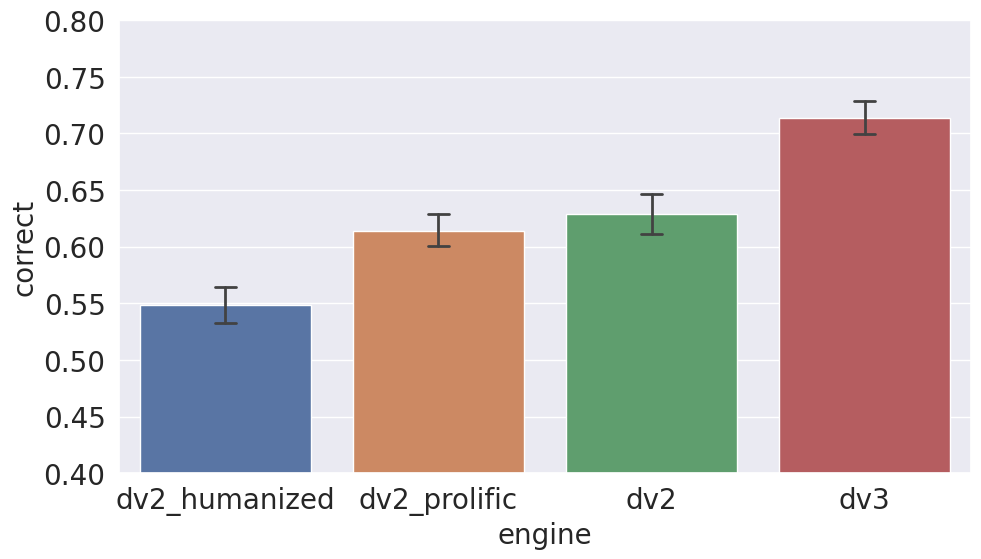

In [13]:
sns.set({'figure.figsize':(11, 6)})
df2 = df.groupby(['prolific_id', 'engine'], as_index=False).mean()
sns.barplot(x='engine', y='correct', data=df2, order=['dv2_humanized', 'dv2_prolific', 'dv2', 'dv3'], ci=68, capsize=.1, errwidth=2)
plt.ylim(.4, .8)
pg.ttest(df2[df2.engine=='dv2_humanized'].correct, .5)

In [77]:
df_all = pd.read_csv('H+GPT3/all_final.csv')
sns.set(
    rc={'figure.figsize':(23,12), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 13
        , 'ytick.labelsize': 13, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})

df_all['agree_a0'] = df_all.a0.str.contains('yes')
df_AI = df_all[df_all.source=='AI'].groupby(['title', 'cond'], as_index=False).agree_a0.mean().sort_values('title', ascending=False).rename(columns={'agree_a0': 'AI'})
df_Human = df_all[df_all.source=='Human'].groupby(['title', 'cond'], as_index=False).agree_a0.mean().sort_values('title', ascending=False).rename(columns={'agree_a0': 'H'})
diff = pd.concat([df_AI, df_Human.H], axis=1)
diff['diff'] = diff.AI - diff.H
# df_AI.drop('item_id', axis=1, inplace=True)
# df_Human.drop('item_id', axis=1, inplace=True)
# corr.corr()
diff['item_id'] = diff.index


# plt.subplot(2, 1, 1)
# sns.barplot(x='item_id', y='diff', data=diff, hue='cond', order=diff.sort_values(['diff', 'cond'], ascending=False).index)
# plt.ylabel('delta (AI - Human) agreement')
# # sns.heatmap(abs(df_AI.AI - df_Human.H), annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, cbar=False)

# plt.subplot(2, 2, 3)
# sns.scatterplot(x='AI', y='H', data=diff, hue='cond', legend=False)
# plt.annotate(f'corr={round(diff.corr().H.values[0], 2)}', xy=(.2, .5))


## add similarity score to df where title is the same in diff
# check if diff.title contains Sophie's Choice 
df.loc[df['title'].str.contains('Sophie'), 'title'] = 'Sophie Choice'
diff.loc[diff['title'].str.contains('Sophie'), 'title'] = 'Sophie Choice'
df['sim_score'] = df.title.apply(lambda x: diff[diff.title.str.contains(x)]['diff'].values[0])




/tmp/ipykernel_1589920/128057474.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


<AxesSubplot:>

(0.0, 1.0)

(-0.1, 1.1)

([<matplotlib.axis.XTick at 0x7f89df0a71c0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

Text(0.5, 1.0, 'Turing Test Accuracy')

([], [])

                T  dof alternative         p-val           CI95%   cohen-d  \
T-test -10.348611   74   two-sided  4.956876e-16  [-0.32, -0.21]  1.417887   

             BF10  power  
T-test  1.294e+13    1.0  
               T  dof alternative     p-val         CI95%   cohen-d      BF10  \
T-test  4.543088  148   two-sided  0.000011  [0.05, 0.13]  0.741883  1506.912   

           power  
T-test  0.994667  
               T  dof alternative         p-val           CI95%   cohen-d  \
T-test -7.514093  148   two-sided  5.038656e-12  [-0.22, -0.13]  1.227046   

             BF10  power  
T-test  1.352e+09    1.0  


<AxesSubplot:>

(0.0, 1.0)

(-0.1, 1.1)

([<matplotlib.axis.XTick at 0x7f89defea970>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

Text(0.5, 1.0, 'Agreement (Yes/No)')

([], [])

               T  dof alternative     p-val           CI95%  cohen-d    BF10  \
T-test -3.298382   74   two-sided  0.001497  [-0.08, -0.02]  0.44471  17.224   

           power  
T-test  0.967181  


<AxesSubplot:>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement (Justification)')

([<matplotlib.axis.XTick at 0x7f89deb25c70>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

([], [])

               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -3.025945   74   two-sided  0.003408  [-0.07, -0.02]  0.375861  8.258   

           power  
T-test  0.894817  


Text(0.4, 1.05, 'dv2_humanized')

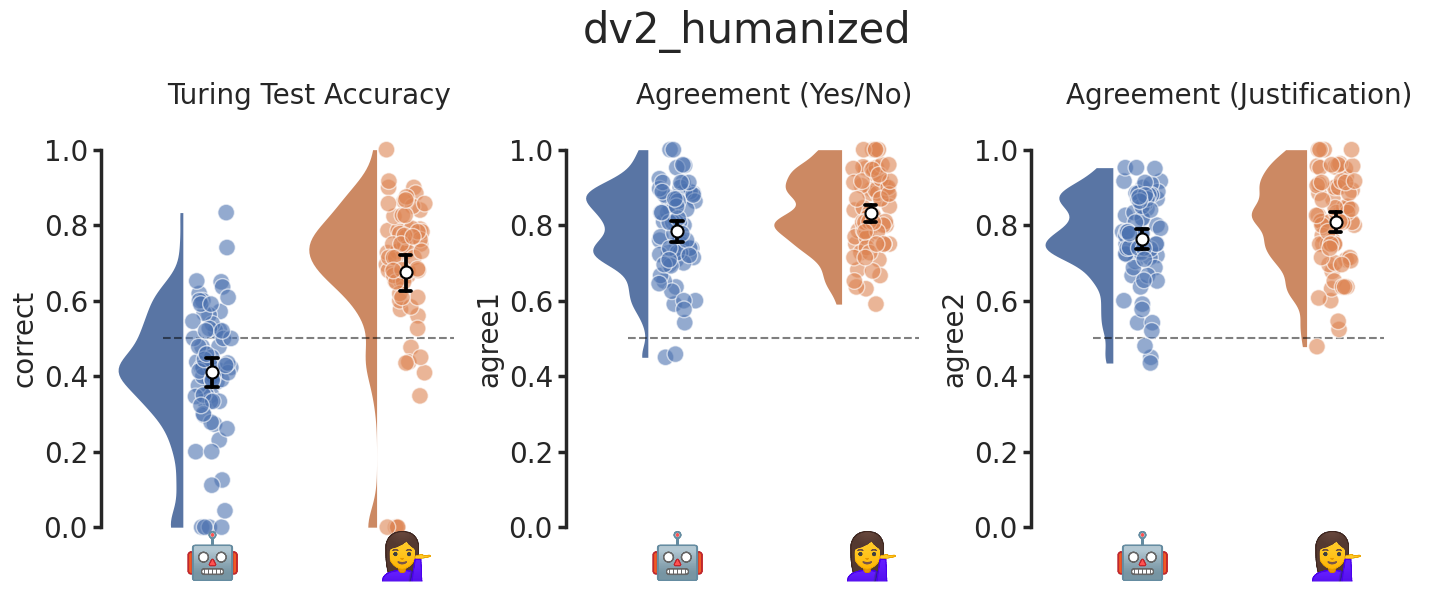

In [5]:
sns.set(
    rc={'figure.figsize':(23,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

engine = 'dv2_humanized'

# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
avg = df[(df.engine==engine)& (df.q_id==2)].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 1)
# sns.barplot(x='source', y='correct', data=avg, errorbar='se'
# sns.stripplot(x='source', y='correct', data=avg, alpha=0.5, jitter=0.1, size=15, color='black')
#
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='correct', markersize=12, df=avg, order=['AI', 'Human'])
plt.ylim(0, 1)
plt.ylim(-.1, 1.1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Turing Test Accuracy')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);

# AI correct and Human correct is significantly diff
print(pg.ttest(avg[avg.source=='AI'].correct, avg[avg.source=='Human'].correct, paired=True))
n = len(avg[avg.source=='AI'].correct)
print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='AI'].correct))
print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='Human'].correct))

# -------------------------------------------------------------------------------
# Plot 2: Agreement 1
# -------------------------------------------------------------------------------
avg = df[(df.engine==engine) & (df.q_id==0)].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree1', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree1', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(0, 1)
plt.ylim(-.1, 1.1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Agreement (Yes/No)')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
# AI agree1 and Human agree1 is significantly diff
print(pg.ttest(avg[avg.source=='AI'].agree1, avg[avg.source=='Human'].agree1, paired=True))
# n = len(avg[avg.source=='AI'].correct)
# print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='AI'].correct))
# print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='Human'].correct))

# -------------------------------------------------------------------------------
# Plot 3: Agreement 2
# -------------------------------------------------------------------------------
avg = df[(df.engine==engine) & df.q_id==1].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 3)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree2', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree2', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree2', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
# AI agree2 and Human agree2 is significantly diff
print(pg.ttest(avg[avg.source=='AI'].agree2, avg[avg.source=='Human'].agree2, paired=True))


# -------------------------------------------------------------------------------
# Plot 4: RT
# -------------------------------------------------------------------------------
#avg = df.groupby(['prolific_id', 'source'], as_index=False).mean()
#plt.subplot(1, 4, 4)
## plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## plt.plot([-1, 2], [0.5, 0.5], '--', color='black', alpha=0.5)
##sns.barplot(x='source', y='rt', data=avg, errorbar='se')
##sns.stripplot(x='source', y='rt', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
#raincloud(x='source', y='rt', markersize=12, df=avg, order=['AI', 'Human'])
#plt.ylim(0, 100000)
#plt.title('RT (ms)')
#plt.xlabel('')
#sns.despine(offset=10, trim=True, bottom=True);
#plt.xticks([])
#plt.gca().spines['left'].set_linewidth(2.5)
#for i, c in enumerate(avg.source.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#
# plt.tight_layout()
plt.suptitle(engine, fontsize=30, horizontalalignment='center', y=1.05, x=0.4)

# ADD CORRECTNESS SCORE

In [8]:
def rule(x):
   dic = ['HIV', 'Mrs', 'VCR', 'Monday', 'Santiago', 'Morris']
   err = []
   for m in tool.check(x):
         if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE'):
            if any(el in m.replacements for el in dic): 
               continue
            err.append(m)
   return len(err)


unique_a1 = df.a1.unique()
new_df = pd.DataFrame({'a1': unique_a1, 'correctness': [None, ]*len(unique_a1)})
with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
    new_df['correctness'] = new_df.a1.apply(rule)
print('Finished checking correctness, apply to dv2 and dv3')
df['correctness'] = df.a1.apply(lambda x: new_df[new_df.a1==x].correctness.values[0])
#dv3['correctness'] = dv3.a1.apply(lambda x: new_df[new_df.a1==x].correctness.values[0])
#dv2.to_csv('HUMANS/dv2_77.csv')
#dv3.to_csv('HUMANS/dv3_76.csv')
# df[df.engine=='dv2_humanized'].to_csv('dv2_humanized_correctness.csv')

Finished checking correctness, apply to dv2 and dv3


<AxesSubplot:xlabel='source', ylabel='correctness'>

Text(0, 0.5, 'Errors')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.066316,612,two-sided,4.497575e-26,"[-0.13, -0.09]",0.8932,6.744e+22,1.0


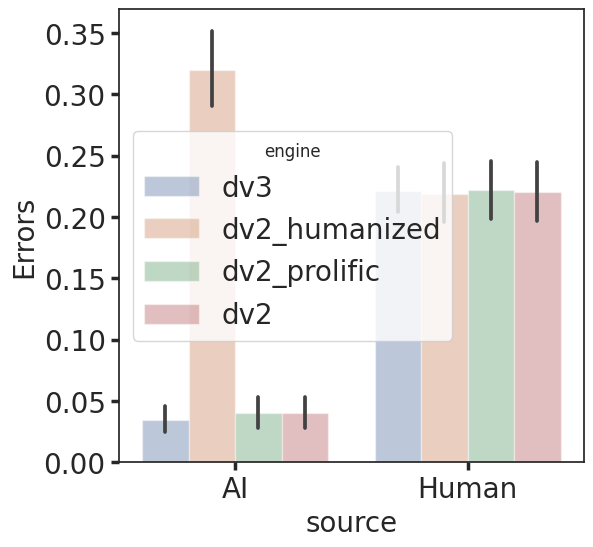

In [9]:
df2 = df.groupby(['prolific_id', 'source', 'engine'], as_index=False).mean()
sns.set({'figure.figsize': (6, 6)})
sns.set_style('ticks')
sns.barplot(x='source', y='correctness', hue='engine', data=df2, alpha=0.4)
# sns.stripplot(x='source', y='correctness', hue='engine', data=df, alpha=0.7, jitter=0.1, size=5, zorder=1)
plt.ylabel('Errors')
# plt.ylim(0, 6 )
pg.ttest(df2[df2.source=='AI'].correctness, df2[df2.source=='Human'].correctness, paired=False)

/tmp/ipykernel_1341153/685724434.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_1341153/685724434.py:51: RuntimeWarning: invalid value encountered in double_scalars
  'd_prime': float(stats.norm.ppf(hits['id'].values[i]) - stats.norm.ppf(false['id'].values[i]))})


<AxesSubplot:xlabel='engine', ylabel='d_prime'>

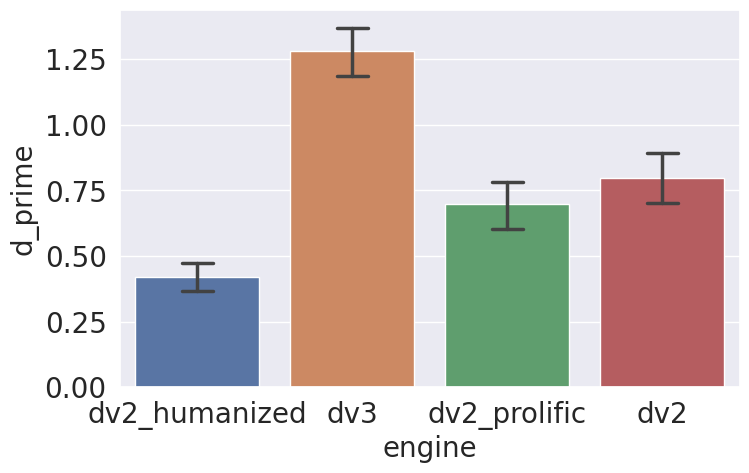

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Yes/No)')

           n         r         CI95%     p-val   BF10    power
pearson  263 -0.025531  [-0.15, 0.1]  0.680237  0.084  0.06964
                            OLS Regression Results                            
Dep. Variable:                 agree1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1702
Date:                Wed, 24 May 2023   Prob (F-statistic):              0.680
Time:                        17:04:47   Log-Likelihood:                 197.97
No. Observations:                 263   AIC:                            -391.9
Df Residuals:                     261   BIC:                            -384.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

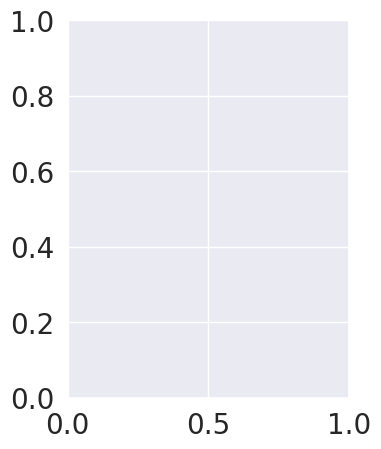

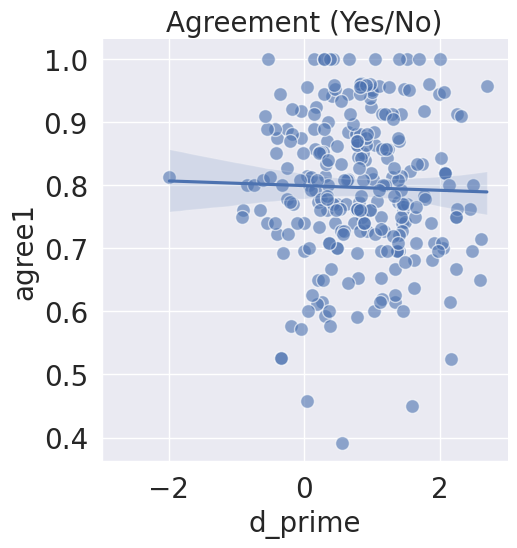

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Justification)')

           n         r         CI95%     p-val  BF10     power
pearson  263 -0.078029  [-0.2, 0.04]  0.207198  0.17  0.243426
                            OLS Regression Results                            
Dep. Variable:                 agree2   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.599
Date:                Wed, 24 May 2023   Prob (F-statistic):              0.207
Time:                        17:04:48   Log-Likelihood:                 161.16
No. Observations:                 263   AIC:                            -318.3
Df Residuals:                     261   BIC:                            -311.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

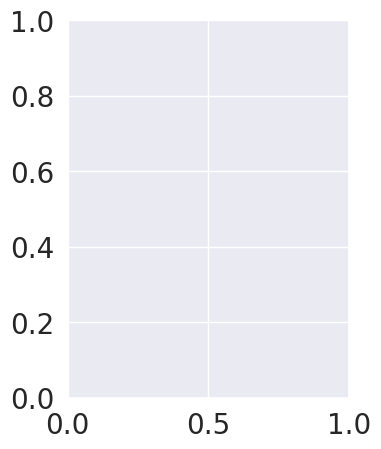

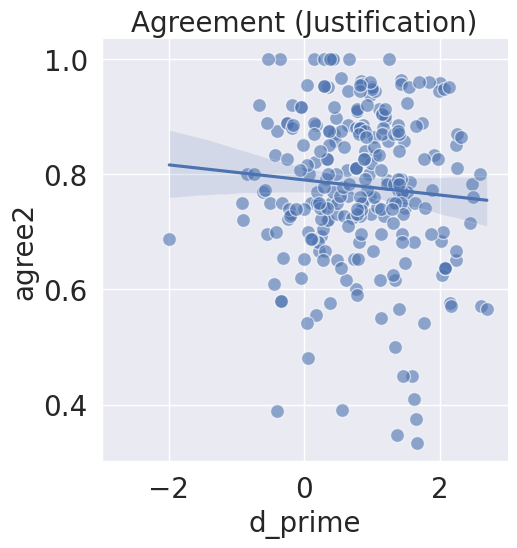

In [173]:
import scipy.stats as stats

sns.set(
    rc={'figure.figsize':(35,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

false = pd.DataFrame()
hits = pd.DataFrame()

labels = ['id', 'agree1', 'agree2']
labels = ['id']
titles = ['Agreement (Yes/No)', 'Agreement (Justification)']

false['id'] = 1 - df[(df.source == 'Human') & (df.q_id == 2)
                     ].groupby('prolific_id', as_index=False).mean().correct
false['engine'] = df[(df.source == 'Human') & (df.q_id == 2)].groupby(['prolific_id', 'engine'], as_index=False).mean().engine
false['prolific_id'] = df[(df.source == 'Human') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().prolific_id

hits['id'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(
    'prolific_id', as_index=False).mean().correct
hits['engine'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(['prolific_id', 'engine'],as_index=False).mean().engine
hits['prolific_id'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().prolific_id

false['agree1'] = 1 - df[(df.source == 'Human') & (df.q_id == 0)
                         ].groupby('prolific_id', as_index=False).mean().agree1

hits['agree1'] = df[(df.source == 'AI') & (df.q_id == 0)].groupby(
    'prolific_id', as_index=False).mean().agree1
false['agree2'] = 1 - df[(df.source == 'Human') & (df.q_id == 1)
                         ].groupby('prolific_id', as_index=False).mean().agree2
hits['agree2'] = df[(df.source == 'AI') & (df.q_id == 1)].groupby(
    'prolific_id', as_index=False).mean().agree2

d = []
for i in range(false['id'].shape[0]):
    d.append({'agree1': hits['agree1'].values[i],
              'agree2': hits['agree2'].values[i],
              'engine': hits['engine'].values[i],
              'prolific_id': hits['prolific_id'].values[i],
              'd_prime': float(stats.norm.ppf(hits['id'].values[i]) - stats.norm.ppf(false['id'].values[i]))})

d = pd.DataFrame(d)  # plt.subplot(1, 4, 1)
d = d[~d.isin([np.nan, np.inf, -np.inf]).any(1)]

sns.set({'figure.figsize': (8,5), "figure.dpi": 100, 'legend.fontsize': 20,})
sns.barplot(x='engine', y='d_prime', data=d, ci=68, capsize=0.2, errwidth=2.5, edgecolor='white')
plt.show()

count = 0
d['d_prime'] = d['d_prime'].astype(float)
d['agree1'] = d['agree1'].astype(float)
for agree in ('agree1', 'agree2'):
    count += 1
    # plt.clear()
    plt.subplot(1, 2, count)
    sns.lmplot(x='d_prime', y=agree, data=d, scatter_kws={
               'alpha': 0.6, 's': 100, 'edgecolor': 'white'})
# snspine(offset=10, trim=True)
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)
    plt.xlim([-3, 3])
    plt.title(titles[count-1])
    print(pg.corr(d['d_prime'], d[agree]))
    print(sm.formula.ols(f'{agree} ~ d_prime', data=d).fit().summary())
    plt.show()

# add d_prime to the original dataframe to the corresponding prolific_id
def f(x):
    try:
        return d[d.prolific_id == x.prolific_id].d_prime.values[0]
    except:
        return np.NaN

# df['d_prime'] = df.apply(f, axis=1)
# for i in df.prolific_id.unique():
    # print(i)
    # assert d.prolific_id.isin([i]).any()

,d_prime,anti_AI_bias
d_prime,1.000000,-0.377711
anti_AI_bias,-0.377711,1.000000


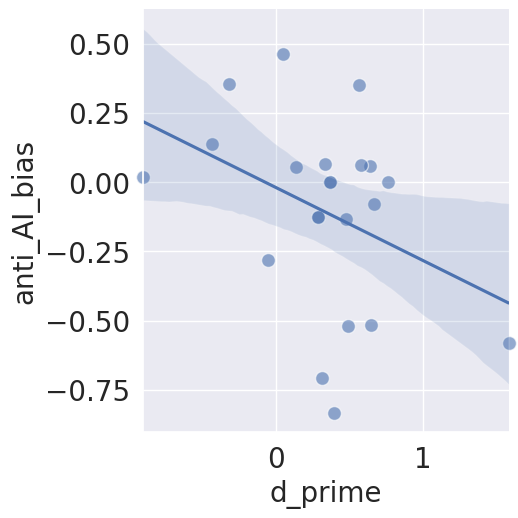

In [52]:
df2 = df[(df.source == 'Human') & (df.q_id == 2) & (df.engine=='dv2_humanized')].groupby(['prolific_id', 'correct'], as_index=False).mean()
new_df = []
for i in df2.prolific_id.unique():
    # new_df['antiAI'] =     print(i)
    # df2[(df2.correct == True) & (df2.prolific_id == i)]
    try:
        new_df.append({
            'd_prime': df2[df2.prolific_id == i].d_prime.values[0],
            'anti_AI_bias': df2[(df2.correct==False) & (df2.prolific_id==i)].agree2.values[0] - df2[(df2.correct == True) & (df2.prolific_id == i)].agree2.values[0]
        })
    except:
        continue

# sns.displot(antiAI)
new_df = pd.DataFrame(new_df)

sns.lmplot(x='d_prime', y='anti_AI_bias', data=new_df, scatter_kws=
           {'clip_on': False, 'alpha': 0.6, 's': 100, 'edgecolor': 'white'})
new_df.corr()

In [134]:
sns.set({'figure.figsize':(6,6), "figure.dpi": 100, 'legend.fontsize': 20,})
df['justif_len'] = df.a1.str.len()
dff = df[(df.q_id == 2) & (df.engine=='dv2')]
dff.loc[dff.answer=='AI', 'a'] = 1
dff.loc[dff.answer=='Human', 'a'] = 0
dff.loc[dff.agree1==True, 'agree1'] = 1
dff.loc[dff.agree1==False, 'agree1'] = 0

dff['agree1'] = dff['agree1'].astype(float)
print(sm.Logit.from_formula('agree1 ~ justif_len*correctness*correct', data=dff).fit().summary())
#sns.lmplot(x='justif_len', y='a', data=dff, logistic=True)
#plt.ylabel('ID Answer (AI=1, Human=0)')
#plt.xlabel('justification length')
#plt.annotate('***', xy=(0, 0), fontsize=20)

Optimization terminated successfully.
         Current function value: 0.498104
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 agree1   No. Observations:                 3542
Model:                          Logit   Df Residuals:                     3534
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 May 2023   Pseudo R-squ.:                 0.01573
Time:                        18:01:37   Log-Likelihood:                -1764.3
converged:                       True   LL-Null:                       -1792.5
Covariance Type:            nonrobust   LLR p-value:                 7.903e-10
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.9282   

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_1341153/297445386

<AxesSubplot:ylabel='d_prime'>

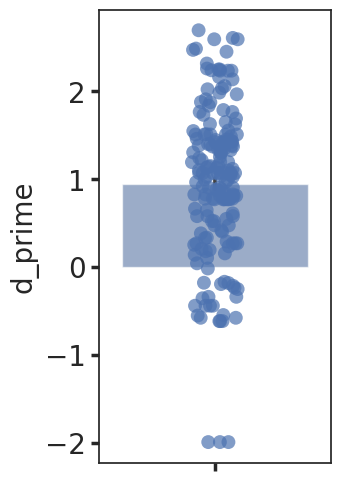

In [ ]:
sns.set({'figure.figsize':(3, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.barplot(y='d_prime', data=d, ci=68, alpha=.6)
sns.stripplot(y='d_prime', data=d, size=10, edgecolor='white', alpha=.7)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

<AxesSubplot:ylabel='answer'>

<AxesSubplot:ylabel='answer'>

<AxesSubplot:ylabel='answer'>

(-0.1, 1.1)

Text(0.5, 1.0, 'DV2')

([<matplotlib.axis.XTick at 0x7f5b53467a90>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

([], [])

Text(0.5, 0, 'choice')

([], [])

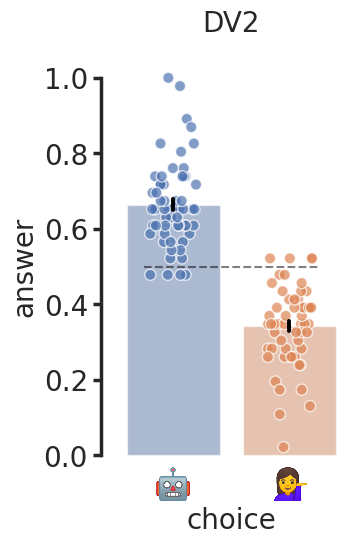

In [152]:

sns.set({'figure.figsize':(3, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.color_palette('deep')

# -------------------------------------------------------------------------------
# Plot: Consistency agreement
# -------------------------------------------------------------------------------
# avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'source'], as_index=False).mean()
df2 = df[(df.q_id==2) & (df.engine=='dv2_humanized')].copy()
df2.loc[df2.answer == 'Not Prolific', 'answer'] = 'AI'
df2.loc[df2.answer == 'Prolific', 'answer'] = 'Human'

x = df2[df2.q_id==2].groupby('prolific_id').answer.value_counts(normalize=True).keys().tolist()
x = [item[1] for item in x]
y = df2[df2.q_id==2].groupby('prolific_id').answer.value_counts(normalize=True)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)

# raincloud(x=x, y=y, markersize=12, df=None, order=['AI', 'Human'])
sns.barplot(x=x, y=y, ci=68, alpha=.5, zorder=0)
sns.stripplot(x=x, y=y,  alpha=0.7, jitter=0.2, size=8, linewidth=1, edgecolor='white', zorder=1)
sns.pointplot(x=x, y=y, ci=68, color='black', scale=0, errorbar='se', join=False, zorder=2)
plt.ylim(-.1, 1.1)
plt.title('DV2')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('choice')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.2)



[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement (both)')

([<matplotlib.axis.XTick at 0x7f5b56d88a90>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

([], [])

Text(0.5, 0, '')

([], [])

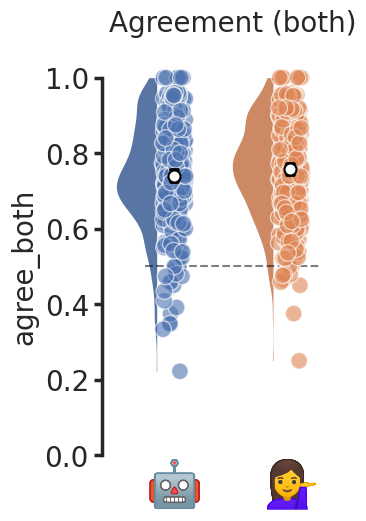

In [149]:
sns.set_style('ticks')
sns.color_palette('deep')
# -------------------------------------------------------------------------------
# Plot: Consistency agreement
# -------------------------------------------------------------------------------
avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree2', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree2', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(-.1, 1.1)
plt.title('Agreement (both)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)



([], [])

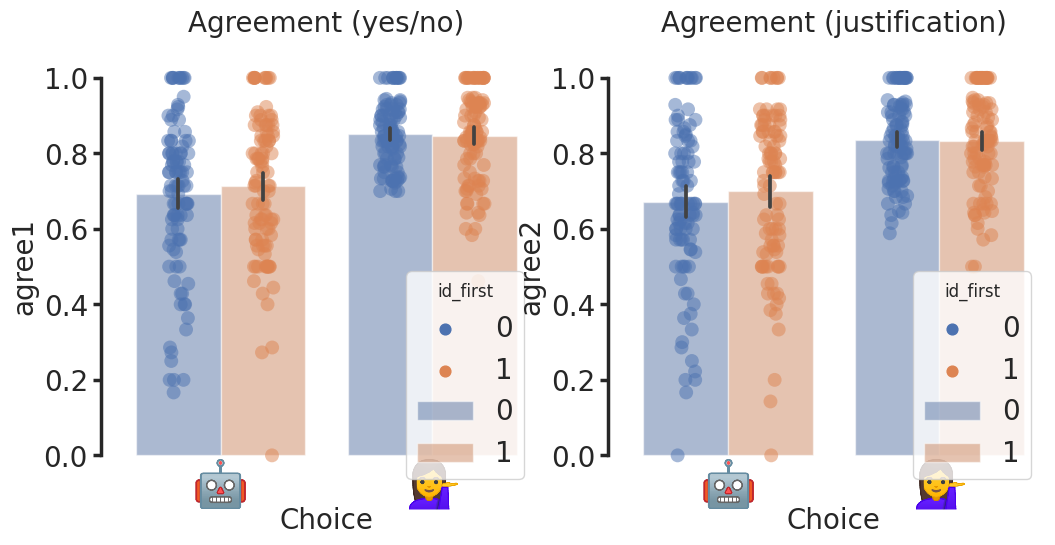

In [ ]:
sns.set({'figure.figsize':(12, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.color_palette('deep')
# -------------------------------------------------------------------------------
# Plot:  agreement according to id first
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 1)
avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'turing', 'id_first'], as_index=False).mean()
# plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='id_first', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree1', data=avg,  hue='id_first', dodge=True, alpha=.5, zorder=0)
g = sns.stripplot(x='turing', y='agree1', data=avg, alpha=0.5, jitter=0.1,
    size=10, hue='id_first', dodge=True, edgecolor='white', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (yes/no)')
plt.xlabel('Choice')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True)
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xticks([])

# -------------------------------------------------------------------------------
# Plot:  agreement justification according to id first
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
avg = df[df.q_id.isin([1])].groupby(['prolific_id', 'turing', 'id_first'], as_index=False).mean()
# plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='id_first', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree2', data=avg,  hue='id_first', dodge=True, alpha=.5, zorder=0)
g = sns.stripplot(x='turing', y='agree2', data=avg, alpha=0.5, jitter=0.1,
    size=10, hue='id_first', dodge=True, edgecolor='white', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (justification)')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('Choice')
plt.xticks([])




<AxesSubplot:xlabel='source', ylabel='dataset_id'>

<AxesSubplot:xlabel='source', ylabel='dataset_id'>

Text(0, 0.5, 'N trials')

Text(0.5, 1.0, 'DV2 humanized')

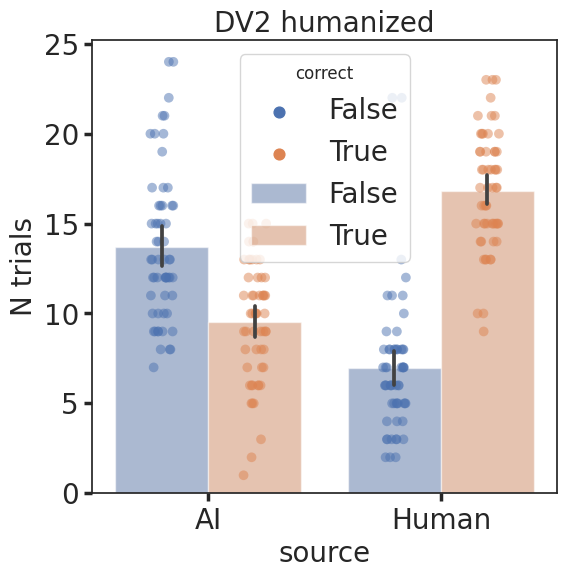

In [150]:
df2 = df[(df.engine=='dv2_humanized') & (df.q_id==2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).count()
sns.set({'figure.figsize':(6, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.barplot(x='source', y='dataset_id', data=df2, hue='correct', dodge=True, alpha=.5, zorder=0)
sns.stripplot(x='source', y='dataset_id', data=df2, alpha=0.5, jitter=0.1, size=7, hue='correct', dodge=True, zorder=1)
plt.ylabel('N trials')
plt.title('DV2 humanized')    

Size of dv2_humanized dataset:  96.66666666666667


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb58cb7250>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree1, ENGINE=dv2


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,source,0.016768,1,68,0.016768,0.498681,0.482493,0.482493,0.001422,1.0
1,correct,0.022380,1,68,0.022380,0.777815,0.380917,0.380917,0.001898,1.0
2,source * correct,0.176066,1,68,0.176066,3.732338,0.057536,0.057536,0.014736,1.0


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 2 (Justification)')

([<matplotlib.axis.XTick at 0x7fbb58c70460>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree2, ENGINE=dv2
             Source        SS  ddof1  ddof2        MS         F     p-unc  \
0            source  0.010335      1     68  0.010335  0.219734  0.640742   
1           correct  0.113019      1     68  0.113019  3.453986  0.067428   
2  source * correct  0.271454      1     68  0.271454  3.542364  0.064100   

   p-GG-corr       ng2  eps  
0   0.640742  0.000686  1.0  
1   0.067428  0.007452  1.0  
2   0.064100  0.017714  1.0  


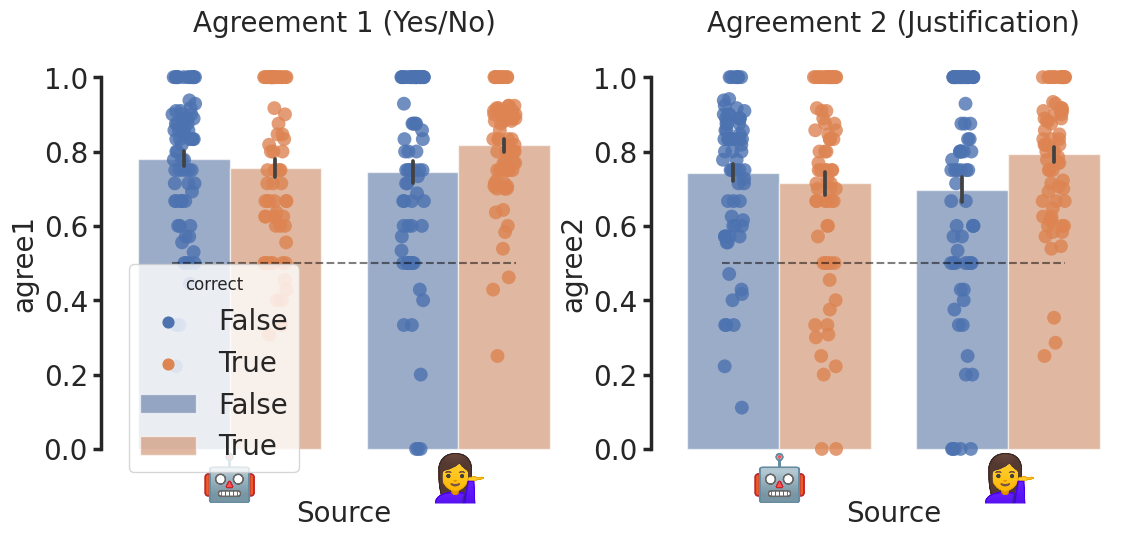

In [10]:

sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------
engine = 'dv2_humanized'
# ids = np.random.choice(df[(df.engine==engine) & (df.q_id == 0) & (df.cond!='non_moral')].prolific_id.unique(), 22, replace=False)
avg = df[(df.engine==engine) & (df.q_id == 2) & (df.cond!='non_moral')].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
print(f'Size of {engine} dataset: ', avg.shape[0]/3)

plt.subplot(2, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)

plt.xlabel('Source')
# plt.legend([], [], frameon=False)
print('ANOVA: VAR=agree1, ENGINE=dv2')
pg.rm_anova(data=avg, dv='agree1', within=['source', 'correct'], subject='prolific_id', detailed=True)


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.subplot(2, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.legend([], [], frameon=False)
plt.xlabel('Source')
print('ANOVA: VAR=agree2, ENGINE=dv2')
print(pg.rm_anova(data=avg, dv='agree2', within=['source', 'correct'], subject='prolific_id', detailed=True))

<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='correct'>

<AxesSubplot:xlabel='source', ylabel='correct'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Correct identification')

([<matplotlib.axis.XTick at 0x7f5b5662a7c0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, 'source')

([], [])

        Source        SS  DF1  DF2        MS           F         p-unc  \
0       engine  1.627206    3  261  0.542402   14.942512  5.257096e-09   
1       source  7.749952    1  261  7.749952  234.583881  3.255293e-38   
2  Interaction  0.239977    3  261  0.079992    2.421297  6.642615e-02   

        np2  eps  
0  0.146578  NaN  
1  0.473348  1.0  
2  0.027077  NaN  


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f5b55ff7a90>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

Text(0.5, 0, 'Source')

([], [])

        Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0       engine  0.090670    3  261  0.030223   2.303521  0.077392  0.025794   
1       source  0.137334    1  261  0.137334  14.689611  0.000159  0.053283   
2  Interaction  0.045387    3  261  0.015129   1.618217  0.185522  0.018261   

   eps  
0  NaN  
1  1.0  
2  NaN  


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 2 (Justification)')

([<matplotlib.axis.XTick at 0x7f5b55f238b0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:747: RuntimeWarning: invalid value encountered in double_scalars
  f_a = ms_a / ms_as
/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:748: RuntimeWarning: invalid value encountered in double_scalars
  f_b = ms_b / ms_bs
/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:749: RuntimeWarning: invalid value encountered in double_scalars
  f_ab = ms_ab / ms_abs
/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:764: RuntimeWarning: invalid value encountered in double_scalars
  ef_a = ss_a / (ss_a + ss_s + ss_as + ss_bs + ss_abs)
/media/getz/ae930ef3-4ac4-4a95-a76a-47e

            Source   SS  ddof1  ddof2   MS   F  p-unc  p-GG-corr  ng2  eps
0           source  0.0     -1      1 -0.0 NaN    NaN        NaN  NaN  1.0
1           engine  0.0     -1      1 -0.0 NaN    NaN        NaN  NaN  1.0
2  source * engine  0.0      1     -1  0.0 NaN    NaN        NaN  NaN  NaN


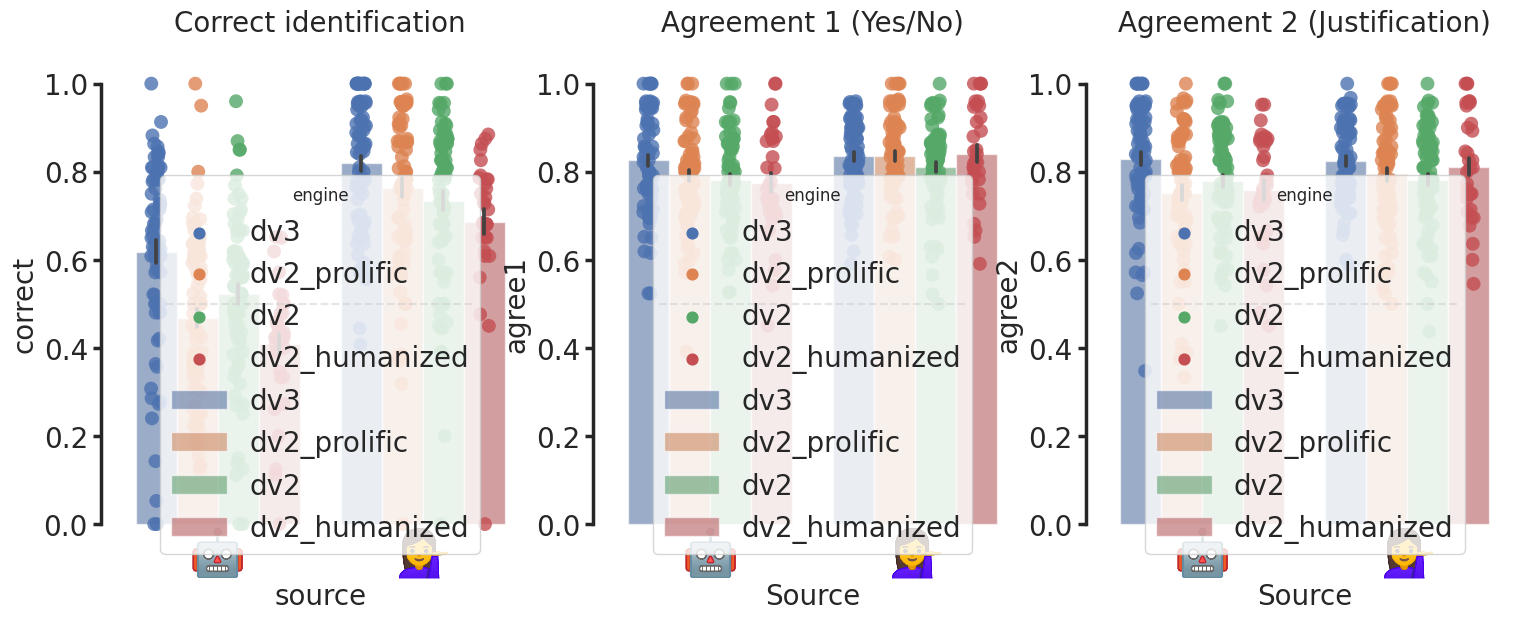

In [115]:
sns.set(
    rc={'figure.figsize':(18,7), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df.groupby(['prolific_id', 'source', 'engine'], as_index=False).mean()

plt.subplot(1, 3, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='correct', data=avg, ci=68, alpha=0.6, hue='engine', zorder=0, dodge=True)
sns.stripplot(x='source', y='correct', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='engine', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Correct identification')
plt.xticks(range(2), ('', ''))
plt.xlabel('source')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.mixed_anova(data=avg, dv='correct', within='source', between='engine', subject='prolific_id'))



# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df.groupby(['prolific_id', 'source', 'engine'], as_index=False).mean()

plt.subplot(1, 3, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, hue='engine', zorder=0, dodge=True)
sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='engine', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')

plt.xlabel('Source')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.mixed_anova(data=avg, dv='agree1', within='source', between='engine', subject='prolific_id'))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.subplot(1, 3, 3)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, hue='engine', zorder=0)
sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='engine', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])

plt.xlabel('Source')
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree2', within=['source', 'engine'], subject='prolific_id', detailed=True))




Text(0.5, 0.98, 'DV3')

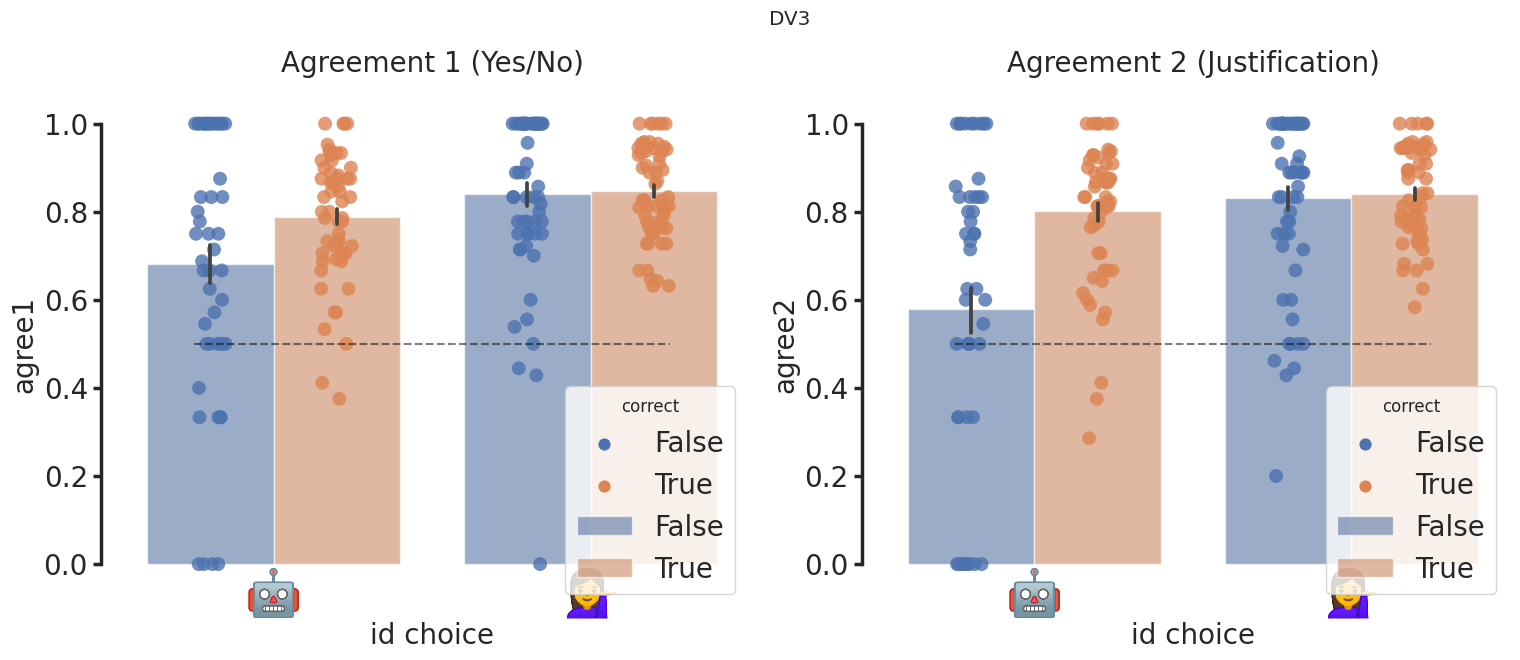

In [ ]:
sns.set(
    rc={'figure.figsize':(18,7), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and turing + anova
# -------------------------------------------------------------------------------


#plt.subplot(1, 3, 1)
#plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='turing', y='correct', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
#sns.stripplot(x='turing', y='correct', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Correct identification')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('id choice')
#plt.xticks([])
#for i, c in enumerate(avg.turing.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='correct', within='turing', between='correct', subject='prolific_id'))



# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and turing + anova
# -------------------------------------------------------------------------------

avg = df[df.engine=='dv3'].groupby(['prolific_id', 'turing', 'correct'], as_index=False).mean()

plt.subplot(1, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='turing', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))

plt.xlabel('id choice')
plt.xticks([])
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='agree1', within='turing', between='correct', subject='prolific_id'))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and turing + anova
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='turing', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])

plt.xlabel('id choice')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.suptitle('DV3')
# plt.legend([], [], frameon=False)
# print(pg.rm_anova(data=avg, dv='agree2', within=['turing', 'correct'], subject='prolific_id', detailed=True))




In [ ]:
df.groupby(['prolific_id', 'source', 'correct'], as_index=False).size()


,prolific_id,source,correct,size
0,542460e3fdf99b691e6ac927,AI,True,51
1,542460e3fdf99b691e6ac927,Human,False,36
2,542460e3fdf99b691e6ac927,Human,True,48
3,5483702ffdf99b24c654b810,AI,False,45
4,5483702ffdf99b24c654b810,AI,True,21
...,...,...,...,...
659,63ea61d8106e3e2dc14c4cc7,Human,True,69
660,63ea627512244090788d46ec,AI,False,12
661,63ea627512244090788d46ec,AI,True,48
662,63ea627512244090788d46ec,Human,False,3


  Source        SS   DF        MS         F     p-unc       ng2       eps
0   cond  0.340806    2  0.170403  7.192593  0.000872  0.024048  0.970557
1  Error  8.055105  340  0.023691       NaN       NaN       NaN       NaN
  Source        SS   DF        MS          F         p-unc     p-GG-corr  \
0   cond  2.099979    2  1.049989  51.383346  3.174503e-20  2.747741e-18   
1  Error  6.947706  340  0.020434        NaN           NaN           NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.148092  0.890238      False  0.876705  0.000015  
1       NaN       NaN        NaN       NaN       NaN  


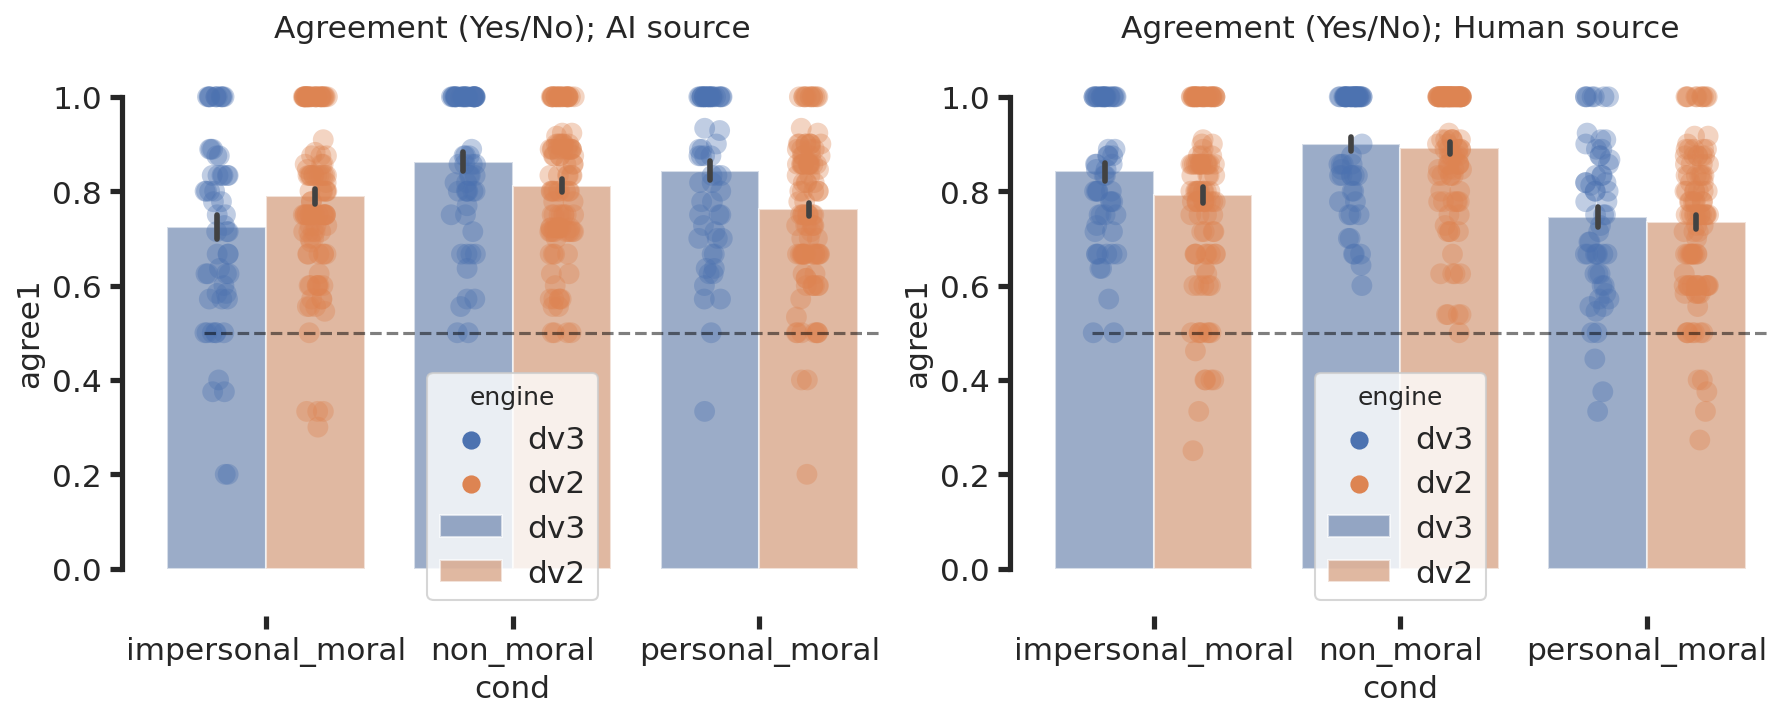

In [ ]:
sns.set(
    rc={'figure.figsize':(14,5), "figure.dpi": 150, 'legend.fontsize': 15, 'axes.labelsize': 15, 'axes.titlesize': 15,
      'xtick.labelsize': 15, 'ytick.labelsize': 15, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df[df.source=='AI'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 1)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); AI source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))


#plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='cond', y='correct', data=avg, ci=68, alpha=0.6)
#sns.stripplot(x='cond', y='correct', data=avg, alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Accuracy Turing')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('')
#plt.xticks([])
## for i, c in enumerate(avg.source.unique()):
#    # offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
#plt.legend([], [], frameon=False)
#print(pg.rm_anova(data=avg, dv='correct', within='cond', subject='prolific_id', detailed=True))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
#
avg = df[df.source=='Human'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 2)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); Human source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))
